#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\b1212\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\b1212\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\b1212\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\b1212\Anaconda3\envs\te

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 46s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(train_history.history['acc'], label='train')
    ax1.plot(train_history.history['val_acc'], label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    ax2.plot(train_history.history['loss'], label='train')
    ax2.plot(train_history.history['val_loss'], label='validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 289s - loss: 1.8130 - acc: 0.3427 - val_loss: 1.6099 - val_acc: 0.4551
Epoch 2/10
 - 257s - loss: 1.4466 - acc: 0.4803 - val_loss: 1.3829 - val_acc: 0.5394
Epoch 3/10
 - 255s - loss: 1.2963 - acc: 0.5379 - val_loss: 1.3054 - val_acc: 0.5841
Epoch 4/10
 - 262s - loss: 1.1905 - acc: 0.5791 - val_loss: 1.2112 - val_acc: 0.6141
Epoch 5/10
 - 258s - loss: 1.1044 - acc: 0.6078 - val_loss: 1.1517 - val_acc: 0.6300
Epoch 6/10
 - 261s - loss: 1.0367 - acc: 0.6343 - val_loss: 1.1067 - val_acc: 0.6293
Epoch 7/10
 - 259s - loss: 0.9747 - acc: 0.6558 - val_loss: 1.0546 - val_acc: 0.6594
Epoch 8/10
 - 261s - loss: 0.9217 - acc: 0.6738 - val_loss: 1.0168 - val_acc: 0.6725
Epoch 9/10
 - 263s - loss: 0.8735 - acc: 0.6930 - val_loss: 0.9844 - val_acc: 0.6732
Epoch 10/10
 - 260s - loss: 0.8189 - acc: 0.7106 - val_loss: 0.9540 - val_acc: 0.6843


'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

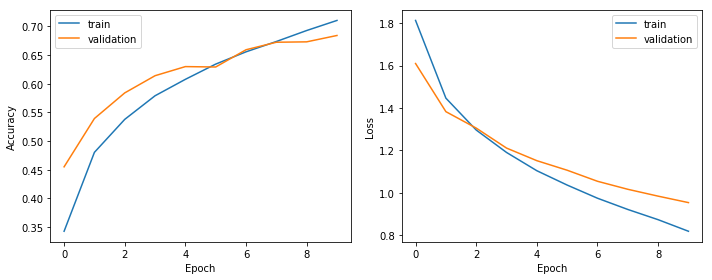

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=2)          

show_train_history(history)

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 277s - loss: 0.0353 - acc: 0.7462 - val_loss: 0.0421 - val_acc: 0.7080
Epoch 2/10
 - 259s - loss: 0.0345 - acc: 0.7539 - val_loss: 0.0418 - val_acc: 0.7086
Epoch 3/10
 - 295s - loss: 0.0341 - acc: 0.7571 - val_loss: 0.0415 - val_acc: 0.7101
Epoch 4/10
 - 314s - loss: 0.0337 - acc: 0.7607 - val_loss: 0.0412 - val_acc: 0.7133
Epoch 5/10
 - 265s - loss: 0.0334 - acc: 0.7623 - val_loss: 0.0409 - val_acc: 0.7148
Epoch 6/10
 - 260s - loss: 0.0330 - acc: 0.7648 - val_loss: 0.0410 - val_acc: 0.7132
Epoch 7/10
 - 250s - loss: 0.0326 - acc: 0.7680 - val_loss: 0.0408 - val_acc: 0.7155
Epoch 8/10
 - 222s - loss: 0.0327 - acc: 0.7671 - val_loss: 0.0408 - val_acc: 0.7151
Epoch 9/10
 - 220s - loss: 0.0325 - acc: 0.7695 - val_loss: 0.0406 - val_acc: 0.7166
Epoch 10/10
 - 224s - loss: 0.0324 - acc: 0.7676 - val_loss: 0.0407 - val_acc: 0.7158


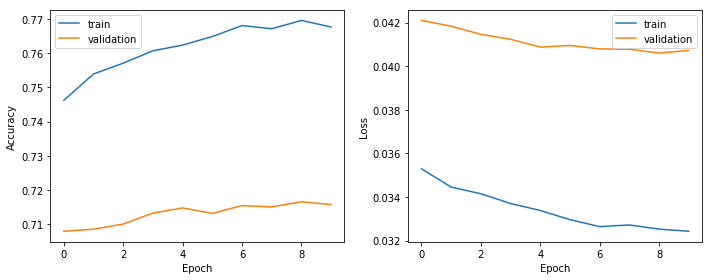

In [24]:

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=2)          

show_train_history(history)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 245s - loss: 0.1113 - acc: 0.9566 - val_loss: 0.1391 - val_acc: 0.9465
Epoch 2/10
 - 226s - loss: 0.1108 - acc: 0.9566 - val_loss: 0.1382 - val_acc: 0.9470
Epoch 3/10
 - 227s - loss: 0.1088 - acc: 0.9576 - val_loss: 0.1393 - val_acc: 0.9468
Epoch 4/10
 - 229s - loss: 0.1076 - acc: 0.9577 - val_loss: 0.1369 - val_acc: 0.9476
Epoch 5/10
 - 227s - loss: 0.1060 - acc: 0.9585 - val_loss: 0.1360 - val_acc: 0.9479
Epoch 6/10
 - 227s - loss: 0.1047 - acc: 0.9590 - val_loss: 0.1361 - val_acc: 0.9480
Epoch 7/10
 - 225s - loss: 0.1030 - acc: 0.9602 - val_loss: 0.1347 - val_acc: 0.9485
Epoch 8/10
 - 223s - loss: 0.1017 - acc: 0.9605 - val_loss: 0.1342 - val_acc: 0.9485
Epoch 9/10
 - 226s - loss: 0.1015 - acc: 0.9602 - val_loss: 0.1337 - val_acc: 0.9491
Epoch 10/10
 - 243s - loss: 0.0996 - acc: 0.9613 - val_loss: 0.1329 - val_acc: 0.9492


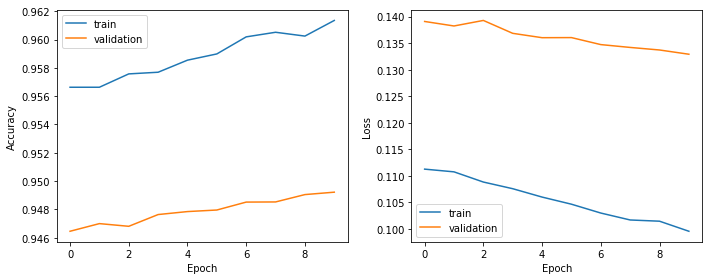

In [25]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=2)          

show_train_history(history)